时间序列数据在很多领域都是重要的结构化数据形式，例如金融、经济、生态学、神经科学和物理学。在多个时间点观测或测量的数据形成了时间序列。许多时间序列是固定频率的，也就是说数据是根据相同的规则定期出现的，例如每15秒、每5分钟或每月1次。时间序列也可以是不规则的，没有固定的时间单位或单位间的偏移量。如何标记和引用时间序列数据取决于应用程序，并且可能有以下其中一项：

* 时间戳，具体的时刻。

* 固定的时间区间，例如2007的1月或整个2010年。

* 时间间隔，由开始和结束时间戳表示。时间区间可以被认为是间隔的特殊情况。

* 实验时间或消耗时间。每个时间戳是相对于特定开始时间的时间的量度（例如，自从被放置在烤箱中每秒烘烤的饼干的直径）。

这里主要关注前三类中的时间序列，尽管许多技术可以应用于实验时间序列，其中索引可以是整数，也可以是从实验开始时的消耗时间的浮点数。最简单和最广泛使用的时间序列是那些由时间戳索引的。

> pandas也支持基于时间间隔的索引，这是一种表示实验时间或消耗时间的有效方式。这里将不会探索时间间隔索引，但是可以在pandas官方文档（http://pandas.pydata.org ）中学会更多。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 11.1　日期和时间数据的类型及工具
Python标准库包含了日期和时间数据的类型，也包括日历相关的功能。`datetime`、`time`和`calendar`模块是开始处理时间数据的主要内容。`datetime.datetime`类型，或简写为`datetime`，是广泛使用的：

In [2]:
from datetime import datetime

now = datetime.now()

print(now)

now.year, now.month, now.day, now.hour, now.minute, now.second, now.microsecond

2020-07-01 09:07:54.656509


(2020, 7, 1, 9, 7, 54, 656509)

datetime既存储了日期，也存储了细化到微秒的时间。`timedelta`表示两个datetime对象的时间差：

In [3]:
delta = datetime(2014, 12, 21) - datetime(2010, 9, 28, 9, 38)

print(delta)

print(delta.days)

print(delta.seconds)

1544 days, 14:22:00
1544
51720


可以为一个datetime对象加上（或减去）一个timedelta或其整数倍来产生一个新的datetime对象：

In [4]:
from datetime import timedelta

start = datetime(2020, 6, 10)

print(start + timedelta(12))

print(start - 2 * timedelta(12))

2020-06-22 00:00:00
2020-05-17 00:00:00


下表概括了datetime模块的数据类型。尽管这里主要关注的是pandas中的数据类型和高阶时间序列操作，但仍然可能在其他地方遇到基于datetime的类型。

| 类型      | 描述                                    |
| -         | -                                       |
| date      | 使用公历日历存储日历日期(年,月,日)         |
| time      | 将时间存储为小时,分钟,秒和微秒             |
| datetime  | 存储日期和时间                           |
| timedelta | 表示两个 datetime值之间的差(如日,秒和微秒) |
| tzinfo    | 用于存储时区信息的基本类型                 |

### 11.1.1　字符串与datetime互相转换
可以使用`str`方法或传递一个指定的格式给`strftime`方法来对datetime对象和pandas的Timestamp对象进行格式化：

In [5]:
stamp = datetime(2011, 1, 3)

print(str(stamp))

print(stamp.strftime('%Y-%m-%d'))

2011-01-03 00:00:00
2011-01-03


下表是格式代码的完整列表。

| 类型 |                                    描述                                     |
| ---- | --------------------------------------------------------------------------- |
| %Y   | 四位的年份                                                                   |
| %y   | 两位的年份                                                                   |
| %m   | 两位的月份\[01,12\]                                                          |
| %d   | 两位的日期号\[01,31\]                                                        |
| %H   | 小时,24小时制\[00,23\]                                                       |
| %I   | 小时,12小时制\[01,12\]                                                       |
| %M   | 两位的分钟\[00,59\]                                                          |
| %S   | 秒\[00,61\](60、61是闰秒)                                                    |
| %w   | 星期日期\[0(星期天),6\]                                                      |
| %U   | 年中的星期数\[00,53\]。以星期天为每周的第一天,一年中第一个星期天前的日期作为"第0周" |
| %W   | 年中的星期数\[00,53\]。以星期一为每周的第一天,一年中第一个星期一前的日期作为"第0周" |
| %z   | 格式为+HHMM或-HHMM的UTC时区偏移;如果没有时区则为空                              |
| %F   | %Y-%m-%d的简写(例如, 2012-4-18)                                              |
| %D   | %m/%d/%y的简写(例如, 04/18/12)                                               |

可以使用`datetime.srtptime`和这些格式代码，将字符串转换日期：

In [6]:
value = '2011-01-03'

print(datetime.strptime(value, '%Y-%m-%d'))

2011-01-03 00:00:00


In [7]:
datestrs = ['7/6/2011', '8/6/2011']

print([datetime.strptime(x, '%m/%d/%Y') for x in datestrs]) 

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]


`datetime.strptime`是在已知格式的情况下转换日期的好方式。然而，每次都必须编写一个格式代码可能有点烦人，特别是对于通用日期格式。在这种情况下，可以使用第三方dateutil包的`parser.parse`方法（这个包在安装pandas时已经自动安装）：

In [8]:
from dateutil.parser import parse

parse('2014-12-21')

datetime.datetime(2014, 12, 21, 0, 0)

dateutil能够解析大部分人类可理解的日期表示：

In [9]:
parse('Sep 28, 2010 10:45 PM')

datetime.datetime(2010, 9, 28, 22, 45)

在国际场合下，日期出现在月份之前很常见，因此可以传递`dayfirst=True`来表明这种情况：

In [10]:
print(parse('6/12/2011', dayfirst=True))

print(parse('6/12/2011'))

2011-12-06 00:00:00
2011-06-12 00:00:00


pandas主要是面向处理日期数组的，无论是用作轴索引还是用作DataFrame中的列。`to_datetime`方法可以转换很多不同的日期表示格式。标准日期格式，比如ISO 8601可以非常快地转换：

In [11]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
print(pd.to_datetime(datestrs))

pd.DataFrame(pd.to_datetime(datestrs))

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)


,0
0,2011-07-06 12:00:00
1,2011-08-06 00:00:00


`to_datetime`方法还可以处理那些被认为是缺失值的值（None、空字符串等）：

In [12]:
idx = pd.to_datetime(datestrs + [None])

print(idx)

print(idx[2])

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)
NaT


In [13]:
pd.isnull(idx)

array([False, False,  True])

`NaT`（Not a time）是pandas中时间戳数据的是null值。

> dateutil.parser是一个有用但并不完美的工具。值得注意的是，它会将一些字符串识别为并不想要的日期——例如，'42'将被解析为2042年的当前日期。

datetime对象还拥有许多其他国家或语言系统的本地化格式选项。例如，德语或法语的月份名称会和英语系统有所不同。

| 类型 |                            描述                            |
| ---- | ---------------------------------------------------------- |
| %a   | 缩写的工作日名称                                             |
| %A   | 全写的工作日名称                                             |
| %b   | 简写的月份名称                                               |
| %B   | 全写的月份名称                                               |
| %c   | 完整的日期和时间(例如,'Tue 01 May 2012 04:20:57 PM')         |
| %p   | AM或PM的地区等效                                            |
| %x   | 适合地区的格式化日期(例如,在美国,'May 1,2012'会生成05/01/2012) |
| %X   | 适合地区的时间(例如,'04:24:12PM')                            |

## 11.2　时间序列基础
pandas中的基础时间序列种类是由时间戳索引的Series，在pandas外部则通常表示为Python字符串或datetime对象：

In [14]:
from datetime import datetime

dates = [datetime(2020, 1, 2), datetime(2020, 1, 5),
         datetime(2020, 1, 7), datetime(2020, 1, 8),
         datetime(2020, 1, 10), datetime(2020, 1, 12)]

# ts = pd.Series(np.random.randn(6), index=dates)
ts = pd.Series(np.arange(6, 12), index=dates)
ts

2020-01-02     6
2020-01-05     7
2020-01-07     8
2020-01-08     9
2020-01-10    10
2020-01-12    11
dtype: int64

在这种情况下，这些datetime对象可以被放入DatetimeIndex中：

In [15]:
ts.index

DatetimeIndex(['2020-01-02', '2020-01-05', '2020-01-07', '2020-01-08',
               '2020-01-10', '2020-01-12'],
              dtype='datetime64[ns]', freq=None)

和其他Series类似，不同索引的时间序列之间的算术运算在日期上自动对齐：

In [16]:
ts + ts[::2]

2020-01-02    12.0
2020-01-05     NaN
2020-01-07    16.0
2020-01-08     NaN
2020-01-10    20.0
2020-01-12     NaN
dtype: float64

`ts[::2]`是将ts中每隔一个的元素选择出。

pandas使用NumPy的datetime64数据类型在纳秒级的分辨率下存储时间戳：

In [17]:
ts.index.dtype

dtype('<M8[ns]')

DatetimeIndex中的标量值是pandas的Timestamp对象：

In [18]:
stamp = ts.index[0]

stamp

Timestamp('2020-01-02 00:00:00')

所有使用datetime对象的地方都可以用Timestamp。此外，Timestamp还可以存储频率信息（如果有的话）并了解如何进行时区转换和其他类型操作。这些处理会稍后介绍。

### 11.2.1　索引、选择、子集
当基于标签进行索引和选择时，时间序列的行为和其他的pandas.Series类似：

In [19]:
stamp = ts.index[2]

ts[stamp]

8

为了方便，还可以传递一个**能解释为日期的字符串**：

In [20]:
print(ts['1/10/2020'])

print(ts['20200105'])

10
7


对一个长的时间序列，可以传递一个年份或一个年份和月份来轻松地选择数据的切片：

In [21]:
longer_ts = pd.Series(np.arange(1,1001), #np.random.randn(1000),
                      index=pd.date_range('1/1/2020', periods=1000))

print(longer_ts.head()) 
print("-"*50)
print(longer_ts.tail())

2020-01-01    1
2020-01-02    2
2020-01-03    3
2020-01-04    4
2020-01-05    5
Freq: D, dtype: int64
--------------------------------------------------
2022-09-22     996
2022-09-23     997
2022-09-24     998
2022-09-25     999
2022-09-26    1000
Freq: D, dtype: int64


In [22]:
longer_ts['2020'].count()

366

这里，字符串'2020'被解释为一个年份，并选择了相应的时间区间。如果指定了月份也是有效的：

In [23]:
longer_ts['02/2020'].count(), longer_ts['2020-05'].count()

(29, 31)

使用datetime对象进行切片也是可以的：

In [24]:
ts

2020-01-02     6
2020-01-05     7
2020-01-07     8
2020-01-08     9
2020-01-10    10
2020-01-12    11
dtype: int64

In [25]:
ts[datetime(2020, 1, 7):]

2020-01-07     8
2020-01-08     9
2020-01-10    10
2020-01-12    11
dtype: int64

因为大部分的时间序列数据是按时间顺序排序的，可以使用不包含在时间序列中的时间戳进行切片，以执行范围查询：

In [26]:
ts['1/6/2020':'20200110']

2020-01-07     8
2020-01-08     9
2020-01-10    10
dtype: int64

和之前一样，可以传递一个字符串的日期、datetime对象或者时间戳。请记住通过这种方式的切片产生了原时间序列的视图，类似于NumPy的数组。这意味着没有数据被复制，并且**在切片上的修改会反映在原始数据上**。

有一个等价实例方法，`truncate`，它可以在两个日期间对Series进行切片：

In [27]:
ts.truncate(before='1/9/2020')

2020-01-10    10
2020-01-12    11
dtype: int64

上面这些操作也都适用于DataFrame，并在其行上进行索引：

In [28]:
dates = pd.date_range('1/1/2020', periods=100, freq='W-WED')

long_df = pd.DataFrame(np.arange(400).reshape(100, 4), # np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

long_df.loc['5-2020']

,Colorado,Texas,New York,Ohio
2020-05-06,72,73,74,75
2020-05-13,76,77,78,79
2020-05-20,80,81,82,83
2020-05-27,84,85,86,87


### 11.2.2　含有重复索引的时间序列
在某些应用中，可能会有多个数据观察值落在特定的时间戳上。下面是个例子：

In [29]:
dates = pd.DatetimeIndex(['1/1/2020', '1/2/2020', '1/2/2020',
                          '1/2/2020', '1/3/2020'])

dup_ts = pd.Series(np.arange(5), index=dates)

dup_ts

2020-01-01    0
2020-01-02    1
2020-01-02    2
2020-01-02    3
2020-01-03    4
dtype: int64

通过检查索引的`is_unique`属性，可以看出索引并不是唯一的：

In [30]:
dup_ts.index.is_unique, dup_ts.is_unique

(False, True)

对上面的Series进行索引，结果是标量值还是Series切片取决于是否有时间戳是重复的：

In [31]:
dup_ts['1/3/2020']  # 不重复

4

In [32]:
dup_ts['1/2/2020']  # 重复

2020-01-02    1
2020-01-02    2
2020-01-02    3
dtype: int64

假设想要聚合含有非唯一时间戳的数据。一种方式就是使用groupby并传递level=0：

In [33]:
# grouped = dup_ts.groupby(by=dup_ts.index)
grouped = dup_ts.groupby(level=0)

grouped.mean()

2020-01-01    0
2020-01-02    2
2020-01-03    4
dtype: int64

In [34]:
grouped.count()

2020-01-01    1
2020-01-02    3
2020-01-03    1
dtype: int64

## 11.3　日期范围、频率和移位
pandas的通用时间序列是不规则的，即时间序列的频率不是固定的。对于很多应用来说，这足够了。然而，经常有需要处理固定频率的场景，例如每日的、每月的或每15分钟，这意味着需要在必要的时候向时间序列中引入缺失值。幸运的是，pandas拥有一整套标准的时间序列频率和工具用于重新采样、推断频率以及生成固定频率的数据范围。例如，可以通过调用resample方法将样本时间序列转换为固定的每日频率数据：

In [35]:
ts

2020-01-02     6
2020-01-05     7
2020-01-07     8
2020-01-08     9
2020-01-10    10
2020-01-12    11
dtype: int64

In [36]:
resampler = ts.resample('D')
resampler

字符串'D'被解释为每日频率。

在频率间转换，又称为重新采样，是一个足够大的话题，将会在稍后介绍。这里展示如何使用基础频率及其倍数。

### 11.3.1　生成日期范围
尽管之前使用的时候没有解释，`pandas.date_range`是用于根据特定频率生成指定长度的DatetimeIndex：

In [37]:
index = pd.date_range('2020-04-01', '2020-06-01')

index

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
               '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
      

默认情况下，`date_range`生成的是每日的时间戳。如果只传递一个起始**或**结尾日期，则必须传递一个用于生成范围的数字：

In [38]:
pd.date_range(start='2020-04-01', periods=20)

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20'],
              dtype='datetime64[ns]', freq='D')

In [39]:
pd.date_range(end='2020-06-01', periods=20)

DatetimeIndex(['2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01'],
              dtype='datetime64[ns]', freq='D')

开始日期和结束日期严格定义了生成日期索引的边界。例如，如果需要一个包含每月最后业务日期的时间索引，可以传递'BM'频率（business end of month，月度业务结尾；参考下表的频率列表），只有落在或在日期范围内的日期会被包括：

In [40]:
pd.date_range('2020-01-01', '2020-12-01', freq='BM')

DatetimeIndex(['2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30',
               '2020-05-29', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-30', '2020-11-30'],
              dtype='datetime64[ns]', freq='BM')

| 别名 | 偏置类型 | 描述 |
| ---- | ---- | ---- |
| D | Day | 日历日的每天 |
| B | BusinessDay | 工作日的每天 |
| H | Hour | 每小时 |
| T或min | Minute | 每分钟 |
| S | Second | 每秒 |
| L或ms | Milli | 每毫秒(1/1,000秒) |
| U | Micro | 每微秒(1/1,000,000秒) |
| M | MonthEnd | 日历日的月底日期 |
| BM | BusinessMonthEnd | 工作日的月底日期 |
| MS | MonthBegin | 日历日的月初日期 |
| BMS | BusinessMonthBegin | 工作日的月初日期 |
| W-MON, W-TUE, … | Week | 按照给定的星期日期按每周取日期<br>(MON,TUE,WED,THU,FRI,SAT或SUN) |
| WOM-1MON,WOM-2MON,… | WeekOfMonth | 在本月的第一,二,三或四周创建按周分隔的日期<br>(例如WOM-3FRI代表每月的第三个星期五) |
| Q-JAN, Q-FEB,… | QuarterEnd | 每个月最后一个日历日的季度日期,以表示月份结束的年份<br>(JAN, FEB, MAR, APR, MAY,JUN. JUL. AUG. SEP,OCT,NOV,或DEC) |
| BQ-JAN, BQ-FEB,… | BusinessQuarterEnd | 每个月最后一个工作日对应的季度日期,以表示月份结束的年份 |
| QS-JAN, QS-FEB, ... | QuarterBegin | 每个月第一个日历日对应的季度日期,以表示月份结束的年份 |
| BQS-JAN, BQS-FEB, … | YearEnd | 给定月份所在的月的最后一个日历日所对应的年度日期 |
| A-JAN, A-FEB, … | BusinessYearEnd | 给定月份所在的月的最后一个工作日所对应的年度日期<br>(JAN,FEB. MAR. APR. MAY. JUN,JUL. AUG. SEP. OCT. NOV,或DEC) |
| BA-JAN, BA-FEB, … | YearBegin | 给定月份所在的月的第一个日历日所对应的年度日期 |
| AS-JAN, AS-FEB, … | BusinessYearBegin | 给定月份所在的月的第一个工作日所对应的年度日期 |
| BAS-JAN, BAS-FEB, … | BusinessYearBegin | 给定月份所在月的第一个工作日所对应的年度日期 |

默认情况下，date_range保留开始或结束时间戳的时间（如果有的话）：

In [41]:
pd.date_range('2020-05-02 12:56:31', periods=5)

DatetimeIndex(['2020-05-02 12:56:31', '2020-05-03 12:56:31',
               '2020-05-04 12:56:31', '2020-05-05 12:56:31',
               '2020-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

有时候会获得包含时间信息的开始日期或结束日期，但是想要生成的是标准化为零点的时间戳。有一个`normalize`选项可以实现这个功能：

In [42]:
pd.date_range('2020-05-02 12:56:31', periods=5, freq='BM', normalize=True)

DatetimeIndex(['2020-05-29', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30'],
              dtype='datetime64[ns]', freq='BM')

### 11.3.2　频率和日期偏置
pandas中的频率是由基础频率和倍数组成的。基础频率通常会有字符串别名，例如'M'代表每月，'H'代表每小时。对于每个基础频率，都有一个对象可以被用于定义日期偏置。例如，每小时的频率可以使用Hour类来表示：

In [43]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()

hour

<Hour>

可以传递一个整数来定义偏置量的倍数：

In [44]:
four_hours = Hour(4)

four_hours

<4 * Hours>

在大多数应用中，都不需要显式地创建这些对象，而是使用字符串别名，如'H'或'4H'。在基础频率前放一个整数就可以生成倍数：

In [45]:
pd.date_range('2020-01-01', '2020-01-03 23:59', freq='4h')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 04:00:00',
               '2020-01-01 08:00:00', '2020-01-01 12:00:00',
               '2020-01-01 16:00:00', '2020-01-01 20:00:00',
               '2020-01-02 00:00:00', '2020-01-02 04:00:00',
               '2020-01-02 08:00:00', '2020-01-02 12:00:00',
               '2020-01-02 16:00:00', '2020-01-02 20:00:00',
               '2020-01-03 00:00:00', '2020-01-03 04:00:00',
               '2020-01-03 08:00:00', '2020-01-03 12:00:00',
               '2020-01-03 16:00:00', '2020-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

多个偏置可以通过加法进行联合：

In [46]:
Hour(2) + Minute(30)

<150 * Minutes>

类似地，可以传递频率字符串，例如'1h30min'将会有效地转换为同等的表达式：

In [47]:
# pd.date_range('2020-01-01', periods=10, freq='90T') 与下面的一致
pd.date_range('2020-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:30:00',
               '2020-01-01 03:00:00', '2020-01-01 04:30:00',
               '2020-01-01 06:00:00', '2020-01-01 07:30:00',
               '2020-01-01 09:00:00', '2020-01-01 10:30:00',
               '2020-01-01 12:00:00', '2020-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

有些频率描述点的时间并不是均匀分隔的。例如，'M'（日历月末）和'BM'（月内最后工作日）取决于当月天数，以及像之后的例子中，取决于月末是否是周末。这些日期称为`锚定偏置量`。

根据上表，可以获得pandas中的频率代码和日期偏置类。

> 用户可以自行定义频率类型，用于提供pandas中没有的日期逻辑，但完整的实现细节是超出介绍内容。

#### 11.3.2.1　月中某星期的日期

"月中某星期"（week of month）的日期是一个有用的频率类，以'WOM'开始。它允许获取每月第三个星期五这样的日期：

In [48]:
rng = pd.date_range('2020-01-01', '2020-09-01', freq='WOM-3FRI')

list(rng)

[Timestamp('2020-01-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-02-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-03-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-04-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-05-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-06-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-07-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-08-21 00:00:00', freq='WOM-3FRI')]

### 11.3.3　移位（前向和后向）日期
"移位"是指将日期按时间向前移动或向后移动。Series和DataFrame都有一个`shift`方法用于进行简单的前向或后向移位，而不改变索引：

In [49]:
ts = pd.Series(np.arange(1,5), # np.random.randn(4),
               index=pd.date_range('1/1/2020', periods=4, freq='M'))

ts    

2020-01-31    1
2020-02-29    2
2020-03-31    3
2020-04-30    4
Freq: M, dtype: int64

In [50]:
ts.shift(2)

2020-01-31    NaN
2020-02-29    NaN
2020-03-31    1.0
2020-04-30    2.0
Freq: M, dtype: float64

In [51]:
ts.shift(-2)

2020-01-31    3.0
2020-02-29    4.0
2020-03-31    NaN
2020-04-30    NaN
Freq: M, dtype: float64

像上面这样进行移位时，会在时间序列的起始位或结束位引入缺失值。

`shift`常用于计算时间序列或DataFrame多列时间序列的百分比变化，代码实现如下：

In [52]:
ts / ts.shift(1) - 1

2020-01-31         NaN
2020-02-29    1.000000
2020-03-31    0.500000
2020-04-30    0.333333
Freq: M, dtype: float64

由于简单移位并不改变索引，一些数据会被丢弃。因此，如果频率是已知的，则可以将频率传递给`shift`来推移时间戳而不是简单的数据：

In [53]:
ts.shift(2, freq='M')

2020-03-31    1
2020-04-30    2
2020-05-31    3
2020-06-30    4
Freq: M, dtype: int64

其他的频率也可以传递，为你前移和后移数据提供灵活性：

In [54]:
ts.shift(3, freq='D')

2020-02-03    1
2020-03-03    2
2020-04-03    3
2020-05-03    4
dtype: int64

In [55]:
ts.shift(1, freq='90T')

2020-01-31 01:30:00    1
2020-02-29 01:30:00    2
2020-03-31 01:30:00    3
2020-04-30 01:30:00    4
Freq: M, dtype: int64

#### 11.3.3.1　使用偏置进行移位日期

pandas日期偏置也可以使用datetime或Timestamp对象完成：

In [56]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime.now()

now + 3 * Day()

Timestamp('2020-07-04 09:07:55.333896')

如果添加了一个锚定偏置量，比如MonthEnd，根据频率规则，第一个增量会将日期“前滚”到下一个日期：

In [57]:
print(now + MonthEnd())

print(now + 2 * MonthEnd())

2020-07-31 09:07:55.333896
2020-08-31 09:07:55.333896


锚定偏置可以使用`rollforward`和`rollback`分别显式地将日期向前或向后"滚动"：

In [58]:
offset = MonthEnd()

print(offset.rollforward(now))

print(offset.rollback(now))

2020-07-31 09:07:55.333896
2020-06-30 09:07:55.333896


将移位方法与groupby一起使用是日期偏置的一种创造性用法：

In [59]:
ts = pd.Series(np.arange(21,31), # np.random.randn(20),
               index=pd.date_range('1/15/2020', periods=10, freq='4d'))

ts

2020-01-15    21
2020-01-19    22
2020-01-23    23
2020-01-27    24
2020-01-31    25
2020-02-04    26
2020-02-08    27
2020-02-12    28
2020-02-16    29
2020-02-20    30
Freq: 4D, dtype: int64

In [60]:
ts.groupby(offset.rollforward).mean()

2020-01-31    23
2020-02-29    28
dtype: int64

另外，使用resample是更简单更快捷的方法：

In [61]:
ts.resample('M').mean()

2020-01-31    23
2020-02-29    28
Freq: M, dtype: int64

## 11.4　时区处理
处理时区通常是时间序列操作中最不愉快的部分。因此，很多时间序列用户选择世界协调时间或UTC，它是格林尼治时间的后继者，也是目前的国际标准。时区通常被表示为UTC的偏置，例如，在夏令时期间，纽约比UTC时间晚4个小时，其余时间晚5个小时。

在Python语言中，时区信息来源于第三方库pytz（可以使用pip或conda安装），其中公开了Olson数据库，这是世界时区信息的汇编。这对于历史数据尤为重要，因为夏令时（DST）转换日期（甚至是UTC偏移量）已经根据地方政府的意愿而改变了很多次。在美国，DST转换时间从1900至今已经多次变更！

如果需要关于pytz库的更多细节信息，需要查看该库的官方文档。pandas封装了pytz的功能，因此可以忽略pytz时区名称以外的API。时区名称可以在文档中找到：

In [62]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

要获得pytz的时区对象，可使用`pytz.timezone`：

In [63]:
tz = pytz.timezone('Asia/Shanghai')

tz

<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

pandas中的方法可以接收时区名称或时区对象。

### 11.4.1　时区的本地化和转换
默认情况下，pandas中的时间序列是时区简单型的。例如，考虑下面的时间序列：

In [64]:
rng = pd.date_range('3/9/2020 9:30', periods=6, freq='D')

ts = pd.Series(np.arange(len(rng)), # np.random.randn(len(rng)), 
               index=rng)

ts

2020-03-09 09:30:00    0
2020-03-10 09:30:00    1
2020-03-11 09:30:00    2
2020-03-12 09:30:00    3
2020-03-13 09:30:00    4
2020-03-14 09:30:00    5
Freq: D, dtype: int64

索引的tz属性是None：

In [65]:
print(ts.index.tz)

None


日期范围可以通过时区集合来生成：

In [66]:
pd.date_range('3/9/2020 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2020-03-09 09:30:00+00:00', '2020-03-10 09:30:00+00:00',
               '2020-03-11 09:30:00+00:00', '2020-03-12 09:30:00+00:00',
               '2020-03-13 09:30:00+00:00', '2020-03-14 09:30:00+00:00',
               '2020-03-15 09:30:00+00:00', '2020-03-16 09:30:00+00:00',
               '2020-03-17 09:30:00+00:00', '2020-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

使用`tz_localize`方法可以从简单时区转换到本地化时区（此时的标准时间会发生变化）：

In [67]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2020-03-09 09:30:00+00:00    0
2020-03-10 09:30:00+00:00    1
2020-03-11 09:30:00+00:00    2
2020-03-12 09:30:00+00:00    3
2020-03-13 09:30:00+00:00    4
2020-03-14 09:30:00+00:00    5
Freq: D, dtype: int64

In [68]:
ts_utc.index

DatetimeIndex(['2020-03-09 09:30:00+00:00', '2020-03-10 09:30:00+00:00',
               '2020-03-11 09:30:00+00:00', '2020-03-12 09:30:00+00:00',
               '2020-03-13 09:30:00+00:00', '2020-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

一旦时间序列被本地化为某个特定的时区，则可以通过tz_convert将其转换为另一个时区：

In [69]:
ts_utc.tz_convert('America/New_York')

2020-03-09 05:30:00-04:00    0
2020-03-10 05:30:00-04:00    1
2020-03-11 05:30:00-04:00    2
2020-03-12 05:30:00-04:00    3
2020-03-13 05:30:00-04:00    4
2020-03-14 05:30:00-04:00    5
Freq: D, dtype: int64

在之前的跨越America/New-York时区的DST转换时间序列的例子中，可以将其本地化到EST并转换为UTC或柏林时间：

In [70]:
ts_eastern = ts.tz_localize('America/New_York')

ts_eastern.tz_convert('UTC')

2020-03-09 13:30:00+00:00    0
2020-03-10 13:30:00+00:00    1
2020-03-11 13:30:00+00:00    2
2020-03-12 13:30:00+00:00    3
2020-03-13 13:30:00+00:00    4
2020-03-14 13:30:00+00:00    5
Freq: D, dtype: int64

In [71]:
ts_eastern.tz_convert('Asia/Shanghai')

2020-03-09 21:30:00+08:00    0
2020-03-10 21:30:00+08:00    1
2020-03-11 21:30:00+08:00    2
2020-03-12 21:30:00+08:00    3
2020-03-13 21:30:00+08:00    4
2020-03-14 21:30:00+08:00    5
Freq: D, dtype: int64

`tz_localize`和`tz_convert`也是DatetimeIndex的实例方法：

In [72]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2020-03-09 09:30:00+08:00', '2020-03-10 09:30:00+08:00',
               '2020-03-11 09:30:00+08:00', '2020-03-12 09:30:00+08:00',
               '2020-03-13 09:30:00+08:00', '2020-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

> 简单时间戳的本地化也会检查夏时制转换周围的模糊或不存在的时间。

### 11.4.2　时区感知时间戳对象的操作
与时间序列和日期范围类似，单独的Timestamp对象也可以从简单时间戳本地化为时区感知时间戳，并从一个时区转换为另一个时区：

In [73]:
stamp = pd.Timestamp('2020-03-12 04:00')

stamp_utc = stamp.tz_localize('utc')

stamp_utc.tz_convert('America/New_York')

Timestamp('2020-03-12 00:00:00-0400', tz='America/New_York')

也可以在创建Timestamp的时候传递一个时区：

In [74]:
stamp_moscow = pd.Timestamp('2020-03-12 04:00', tz='Europe/Moscow')

stamp_moscow

Timestamp('2020-03-12 04:00:00+0300', tz='Europe/Moscow')

时区感知的Timestamp对象内部存储了一个Unix纪元（1970年1月1日）至今的纳秒数量UTC时间戳数值，**该数值在时区转换中是不变的**：

In [75]:
stamp_utc.value

1583985600000000000

In [76]:
stamp_utc.tz_convert('America/New_York').value

1583985600000000000

在使用pandas的DateOffset进行时间算术时，pandas尽可能遵从夏时制。这里构建恰好在DST转换之前发生的时间戳（向前和向后）。首先，构造转换到DST之前的30分钟的时间：

In [77]:
from pandas.tseries.offsets import Hour

stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [78]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

之后，构建从DST进行转换前的90分钟：

In [79]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [80]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 11.4.3　不同时区间的操作
如果两个时区不同的时间序列需要联合，那么结果将是UTC时间的。由于时间戳以UTC格式存储，这是一个简单的操作，不需要转换：

In [81]:
rng = pd.date_range('3/7/2020 9:30', periods=10, freq='B')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2020-03-09 09:30:00   -0.880940
2020-03-10 09:30:00   -0.364292
2020-03-11 09:30:00   -0.018994
2020-03-12 09:30:00    0.298282
2020-03-13 09:30:00   -1.591601
2020-03-16 09:30:00   -1.840362
2020-03-17 09:30:00   -0.286162
2020-03-18 09:30:00   -1.238553
2020-03-19 09:30:00    0.280425
2020-03-20 09:30:00   -1.273115
Freq: B, dtype: float64

In [82]:
ts1 = ts[:7].tz_localize('Asia/Shanghai')

ts2 = ts1[2:].tz_convert('America/New_York')

ts1, ts2

(2020-03-09 09:30:00+08:00   -0.880940
 2020-03-10 09:30:00+08:00   -0.364292
 2020-03-11 09:30:00+08:00   -0.018994
 2020-03-12 09:30:00+08:00    0.298282
 2020-03-13 09:30:00+08:00   -1.591601
 2020-03-16 09:30:00+08:00   -1.840362
 2020-03-17 09:30:00+08:00   -0.286162
 Freq: B, dtype: float64,
 2020-03-10 21:30:00-04:00   -0.018994
 2020-03-11 21:30:00-04:00    0.298282
 2020-03-12 21:30:00-04:00   -1.591601
 2020-03-15 21:30:00-04:00   -1.840362
 2020-03-16 21:30:00-04:00   -0.286162
 Freq: B, dtype: float64)

In [83]:
result = ts1 + ts2

result.index

DatetimeIndex(['2020-03-09 01:30:00+00:00', '2020-03-10 01:30:00+00:00',
               '2020-03-11 01:30:00+00:00', '2020-03-12 01:30:00+00:00',
               '2020-03-13 01:30:00+00:00', '2020-03-16 01:30:00+00:00',
               '2020-03-17 01:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [84]:
result

2020-03-09 01:30:00+00:00         NaN
2020-03-10 01:30:00+00:00         NaN
2020-03-11 01:30:00+00:00   -0.037988
2020-03-12 01:30:00+00:00    0.596564
2020-03-13 01:30:00+00:00   -3.183201
2020-03-16 01:30:00+00:00   -3.680725
2020-03-17 01:30:00+00:00   -0.572325
Freq: B, dtype: float64

## 11.5　时间区间和区间算术
时间区间表示的是时间范围，比如一些天、一些月、一些季度或者是一些年。Period类表示的正是这种数据类型，需要一个字符串或数字来表示频率：

In [85]:
p = pd.Period(2008, freq='A-DEC')

p

Period('2008', 'A-DEC')

在这个例子中，Period对象表示的是从2008年1月1日到2008年12月31日（包含在内）的时间段。在时间段上增加或减去整数可以方便地根据它们的频率进行移位。

In [86]:
p + 5

Period('2013', 'A-DEC')

In [87]:
p - 2

Period('2006', 'A-DEC')

如果两个区间拥有相同的频率，则它们的差是它们之间的单位数：

In [88]:
pd.Period('2014', freq='A-DEC') - p

<6 * YearEnds: month=12>

使用`period_range`函数可以构造规则区间序列：

In [89]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

PeriodIndex类存储的是区间的序列，可以作为任意pandas数据结构的轴索引：

In [90]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.377105
2000-02    0.259322
2000-03   -0.214454
2000-04   -0.035295
2000-05    0.922813
2000-06   -0.491412
Freq: M, dtype: float64

如果有一个字符串数组，也可以使用PeriodIndex类：

In [91]:
values = ['2001Q3', '2002Q2', '2003Q1']

index = pd.PeriodIndex(values, freq='Q-DEC')

index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 11.5.1　区间频率转换
使用`asfreq`可以将区间和PeriodIndex对象转换为其他的频率。例如，假设有一个年度区间，并且想要在一年的开始或结束时将其转换为月度区间：

In [92]:
p = pd.Period('2007', freq='A-DEC')

p

Period('2007', 'A-DEC')

In [93]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [94]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

可以将`Period('2007'，'A-DEC')`看作一段时间中的一种游标，将时间按月份划分。对于除十二月以外的一个月结束的财政年度，相应的每月分期是不同的：

In [95]:
p = pd.Period('2007', freq='A-JUN')

print(p)
print(p.asfreq('M', 'start'))
print(p.asfreq('M', 'end'))

2007
2006-07
2007-06


当从高频率向低频率转换时，pandas根据子区间的"所属"来决定父区间。例如，在A-JUN频率中，Aug-2007是2008区间的一部分：

In [96]:
p = pd.Period('Aug-2007', 'M')

p.asfreq('A-JUN')

Period('2008', 'A-JUN')

完整的PeriodIndex对象或时间序列可以按照相同的语义进行转换：

In [97]:
rng = pd.period_range('2016', '2020', freq='A-DEC')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2016    0.437908
2017    0.423495
2018    0.411235
2019   -0.943313
2020    1.593732
Freq: A-DEC, dtype: float64

In [98]:
ts.asfreq('M', how='start')

2016-01    0.437908
2017-01    0.423495
2018-01    0.411235
2019-01   -0.943313
2020-01    1.593732
Freq: M, dtype: float64

这里，年度区间将被替换为对应于每个年度区间内的第一个月的月度区间。如果想要每年最后一个工作日，可以使用'B'频率来表示想要的是区间的末端：

In [99]:
ts.asfreq('B', how='end')

2016-12-30    0.437908
2017-12-29    0.423495
2018-12-31    0.411235
2019-12-31   -0.943313
2020-12-31    1.593732
Freq: B, dtype: float64

### 11.5.2　季度区间频率
季度数据是会计、金融和其他领域的标准。很多季度数据是在财年结尾报告的，通常是一年12个月中的最后一个日历日或工作日。因此，由于是财年结尾，区间2012Q4有着不同的意义。pandas支持所有的可能的12个季度频率从Q-JAN到Q-DEC：

In [100]:
p = pd.Period('2012Q4', freq='Q-FEB')

p

Period('2012Q4', 'Q-FEB')

在财年结束于1月的情况下，2012Q4运行时间为11月至1月，可以通过转换为每日频率进行检查。

In [101]:
p.asfreq('D', 'start')

Period('2011-12-01', 'D')

In [102]:
p.asfreq('D', 'end')

Period('2012-02-29', 'D')

因此，做简单的区间算术是可行的，例如，要获取在季度倒数第二个工作日下午4点的时间戳，可以这么做：

In [103]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

p4pm

Period('2012-02-28 16:00', 'T')

In [104]:
p4pm.to_timestamp()

Timestamp('2012-02-28 16:00:00')

可以使用`peroid_range`生成季度序列。它的算术也是一样的：

In [105]:
rng = pd.period_range('2019Q3', '2020Q4', freq='Q-JAN')

ts = pd.Series(np.arange(len(rng)), index=rng)

ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
2020Q4    5
Freq: Q-JAN, dtype: int64

In [106]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

ts.index = new_rng.to_timestamp()

ts

2018-10-30 16:00:00    0
2019-01-30 16:00:00    1
2019-04-29 16:00:00    2
2019-07-30 16:00:00    3
2019-10-30 16:00:00    4
2020-01-30 16:00:00    5
dtype: int64

### 11.5.3　将时间戳转换为区间（以及逆转换）
通过时间戳索引的Series和DataFrame可以被`to_period`方法转换为区间：

In [107]:
rng = pd.date_range('2020-01-01', periods=3, freq='M')

ts = pd.Series(np.random.randn(3), index=rng)

ts

2020-01-31   -0.712268
2020-02-29    0.179145
2020-03-31    1.555591
Freq: M, dtype: float64

In [108]:
pts = ts.to_period()

pts

2020-01   -0.712268
2020-02    0.179145
2020-03    1.555591
Freq: M, dtype: float64

由于区间是非重叠时间范围，一个时间戳只能属于给定频率的单个区间。尽管默认情况下根据时间戳推断出新PeriodIndex的频率，但可以指定任何想要的频率。在结果中包含重复的区间也是没有问题的：

In [109]:
rng = pd.date_range('1/29/2020', periods=6, freq='D')

ts2 = pd.Series(np.random.randn(6), index=rng)

ts2

2020-01-29    0.905754
2020-01-30    0.560368
2020-01-31   -1.006489
2020-02-01   -0.917973
2020-02-02    1.002084
2020-02-03    0.558899
Freq: D, dtype: float64

In [110]:
ts2.to_period('M')

2020-01    0.905754
2020-01    0.560368
2020-01   -1.006489
2020-02   -0.917973
2020-02    1.002084
2020-02    0.558899
Freq: M, dtype: float64

使用`to_timestamp`可以将区间再转换为时间戳：

In [111]:
pts = ts2.to_period()

pts

2020-01-29    0.905754
2020-01-30    0.560368
2020-01-31   -1.006489
2020-02-01   -0.917973
2020-02-02    1.002084
2020-02-03    0.558899
Freq: D, dtype: float64

In [112]:
pts.to_timestamp(how='end')

2020-01-29 23:59:59.999999999    0.905754
2020-01-30 23:59:59.999999999    0.560368
2020-01-31 23:59:59.999999999   -1.006489
2020-02-01 23:59:59.999999999   -0.917973
2020-02-02 23:59:59.999999999    1.002084
2020-02-03 23:59:59.999999999    0.558899
Freq: D, dtype: float64

### 11.5.4　从数组生成PeriodIndex
固定频率数据集有时存储在跨越多列的时间范围信息中。例如，在这个宏观经济数据集中，年份和季度在不同列中：

In [113]:
data = pd.read_csv('examples/macrodata.csv')

data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [114]:
data.year.head()

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64

In [115]:
data.quarter.head()

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64

通过将这些数组和频率传递给PeriodIndex，可以联合这些数组形成DataFrame的索引：

In [116]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')

index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [117]:
data.index = index
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## 11.6　重新采样与频率转换
重新采样是指将时间序列从一个频率转换为另一个频率的过程。将更高频率的数据聚合到低频率被称为`向下采样`，而从低频率转换到高频率称为`向上采样`。并不是所有的重新采样都属于上面说的两类；例如，将W-WED（weekly on Wednesday，每周三）转换到W-FRI（每周五）既不是向上采样也不是向下采样。

pandas对象都配有`resample`方法，该方法是所有频率转换的工具函数。`resample`拥有类似于groupby的API；调用`resample`对数据分组，之后再调用聚合函数：

In [118]:
rng = pd.date_range('2020-01-01', periods=100, freq='D')

ts = pd.Series(np.arange(100),# np.random.randn(len(rng)), 
               index=rng)

ts.head()

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
Freq: D, dtype: int64

In [119]:
# 按月重新采样后，求平均值
ts.resample('M').mean()

2020-01-31    15
2020-02-29    45
2020-03-31    75
2020-04-30    95
Freq: M, dtype: int64

In [120]:
ts.resample('M', kind='period').mean()

2020-01    15
2020-02    45
2020-03    75
2020-04    95
Freq: M, dtype: int64

`resample`是一个灵活且高性能的方法，可以用于处理大型时间序列，下面会说明它的语义和用途。下表总结了`resample`方法的部分选项。

| 参数 | 描述 |
| ---- | ---- |
| freq        | 表明所需采样频率的字符串或 DateOffset对象(例如,'M'、'5min'或Second(1))       |
| axis        | 需要采样的轴向;默认是axis=0      |
| fill_method | 向上采样时的插值方式,'ffill'或'bfill';默认是不插值的         |
| closed      | 向下采样中,每段间隔的哪一段是封闭的(包含的), 'right'或'1eft'         |
| label       | 向下采样中,如何用'right'或'left'的箱标签标记聚合结果<br>(例如,9:30到9:35的五分钟间隔可以被标记为9:30或9:35) |
| loffset     | 对箱标签进行时间调校,<br>例如'-1s'/ Second(-1)可以将聚合标签向前移动一秒            |
| limit       | 在前向或后向填充时,填充区间的最大值        |
| kind        | 对区间('period')或时间戳('timestamp')的聚合;默认为时间序列索引的类型   |
| convention  | 在对区间重新采样时,用于将低频周期转换为高频的约定('start'或'end');默认为'end'   |

### 11.6.1　向下采样
将数据聚合到一个规则的低频率上是一个常见的时间序列任务。要聚合的数据不必是固定频率的。期望的频率定义了用于对时间序列切片以聚合的箱体边界。例如，要将时间转换为每月，'M'或'BM'，需要将数据分成一个月的时间间隔。每个间隔是半闭合的，一个数据点只能属于一个时间间隔，时间间隔的并集必须是整个时间帧。在使用resample进行向下采样数据时有些事情需要考虑：

* 每段间隔的哪一边是闭合的

* 如何在间隔的起始或结束位置标记每个已聚合的箱体

为了说明，看下一些一分钟内的数据：

In [121]:
rng = pd.date_range('2020-01-01', periods=12, freq='T')

ts = pd.Series(np.arange(len(rng)), index=rng)

ts

2020-01-01 00:00:00     0
2020-01-01 00:01:00     1
2020-01-01 00:02:00     2
2020-01-01 00:03:00     3
2020-01-01 00:04:00     4
2020-01-01 00:05:00     5
2020-01-01 00:06:00     6
2020-01-01 00:07:00     7
2020-01-01 00:08:00     8
2020-01-01 00:09:00     9
2020-01-01 00:10:00    10
2020-01-01 00:11:00    11
Freq: T, dtype: int64

通过计算每一组的加和将这些数据聚合到五分钟的块或柱内：

In [122]:
ts.resample('5min', closed='right').sum()

2019-12-31 23:55:00     0
2020-01-01 00:00:00    15
2020-01-01 00:05:00    40
2020-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [123]:
ts.resample('5T', closed='left').sum()

2020-01-01 00:00:00    10
2020-01-01 00:05:00    35
2020-01-01 00:10:00    21
Freq: 5T, dtype: int64

传递的频率按五分钟的增量定义了箱体边界。默认情况下，左箱体边界是包含的，因此00:00的值是包含在00:00到00:05间隔内的。传递closed='right'将间隔的闭合端改为了右边：

> [1] closed和label的默认值选择对某些用户来说显得有些奇怪。实际上，这种选择有点武断。对于某些目标频率，`closed ='left'` 更可取，而其他情况下`closed='right'`更有意义。重要的是要记住如何分隔数据的。

产生的时间序列按照每个箱体左边的时间戳被标记。传递`label='right'`可以使用右箱体边界标记时间序列：

In [124]:
ts.resample('5min', closed='right', label='right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:05:00    15
2020-01-01 00:10:00    40
2020-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [125]:
ts.resample('5T', closed='left', label='right').sum()

2020-01-01 00:05:00    10
2020-01-01 00:10:00    35
2020-01-01 00:15:00    21
Freq: 5T, dtype: int64

下图阐明了分钟频率数据按五分钟频率进行的重新采样。

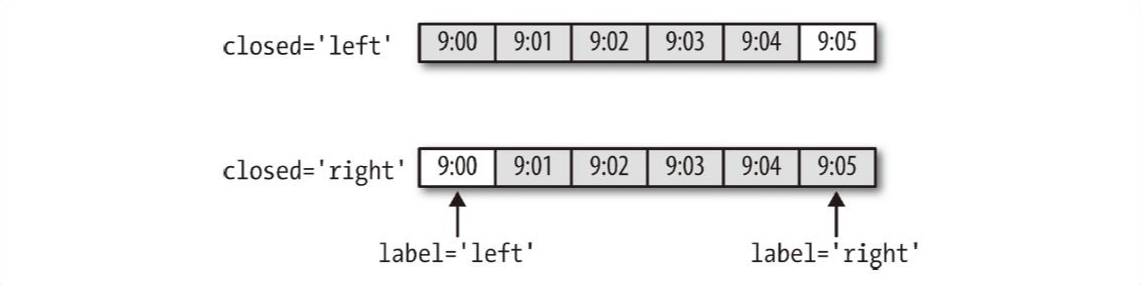

最后，可能需要将结果索引移动一定的数量，例如从右边缘减去一秒，以使其更清楚地表明时间戳所指的间隔。要实现这个功能，向`loffset`传递字符串或日期偏置：

In [126]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()  

2019-12-31 23:59:59     0
2020-01-01 00:04:59    15
2020-01-01 00:09:59    40
2020-01-01 00:14:59    11
Freq: 5T, dtype: int64

> 也可以通过在结果上调用`shift`方法来完成`loffset`的效果。

#### 11.6.1.1　开端-峰值-谷值-结束（OHLC）重新采样

在金融中，为每个数据桶计算四个值是一种流行的时间序列聚合方法：第一个值（开端）、最后一个值（结束）、最大值（峰值）和最小值（谷值）。通过使用ohlc聚合函数你将会获得包含四种聚合值列的DataFrame，这些值在数据的单次扫描中被高效计算：

In [127]:
ts.resample('5min', closed='right').ohlc()

,open,high,low,close
2019-12-31 23:55:00,0,0,0,0
2020-01-01 00:00:00,1,5,1,5
2020-01-01 00:05:00,6,10,6,10
2020-01-01 00:10:00,11,11,11,11


### 11.6.2　向上采样与插值
当从低频率转换为高频率时，并不需要任何聚合。考虑带有每周数据的DataFrame：

In [128]:
frame = pd.DataFrame(np.arange(8).reshape(2,4), # np.random.randn(2, 4),
                     index=pd.date_range('1/1/2020', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame

,Colorado,Texas,New York,Ohio
2020-01-01,0,1,2,3
2020-01-08,4,5,6,7


对这些数据使用聚合函数时，每一组只有一个值，并且会在间隙中产生缺失值。使用`asfreq`方法在不聚合的情况下转换到高频率：

In [129]:
df_daily = frame.resample('D').asfreq()

df_daily

,Colorado,Texas,New York,Ohio
2020-01-01,0.0,1.0,2.0,3.0
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN
2020-01-08,4.0,5.0,6.0,7.0


假设想在非星期三的日期上向前填充每周数值。`fillna`和`reindex`方法中可用的填充或插值方法可用于重采样：

In [130]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2020-01-01,0,1,2,3
2020-01-02,0,1,2,3
2020-01-03,0,1,2,3
2020-01-04,0,1,2,3
2020-01-05,0,1,2,3
2020-01-06,0,1,2,3
2020-01-07,0,1,2,3
2020-01-08,4,5,6,7


可以同样选择仅向前填充一定数量的区间，以限制继续使用观测值的时距：

In [131]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2020-01-01,0.0,1.0,2.0,3.0
2020-01-02,0.0,1.0,2.0,3.0
2020-01-03,0.0,1.0,2.0,3.0
2020-01-04,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN
2020-01-08,4.0,5.0,6.0,7.0


请注意，新的日期索引根本不需要与旧的索引重叠：

In [132]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2020-01-02,0,1,2,3
2020-01-09,4,5,6,7


### 11.6.3　使用区间进行重新采样
对以区间为索引的数据进行采样与时间戳的情况类似：

In [133]:
frame = pd.DataFrame(np.arange(24*4).reshape(24,4), # np.random.randn(24, 4),
                     index=pd.period_range('1-2019', '12-2020',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame.head()

,Colorado,Texas,New York,Ohio
2019-01,0,1,2,3
2019-02,4,5,6,7
2019-03,8,9,10,11
2019-04,12,13,14,15
2019-05,16,17,18,19


In [134]:
annual_frame = frame.resample('A-DEC').mean()

annual_frame

,Colorado,Texas,New York,Ohio
2019,22,23,24,25
2020,70,71,72,73


向上采样更为细致，因为必须在重新采样前决定新频率中在时间段的哪一端放置数值，就像`asfreq`方法一样。`convention`参数默认值是'start'，但也可以是'end'：

In [135]:
# Q-DEC: 每季度，年末在12月
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2019Q1,22,23,24,25
2019Q2,22,23,24,25
2019Q3,22,23,24,25
2019Q4,22,23,24,25
2020Q1,70,71,72,73
2020Q2,70,71,72,73
2020Q3,70,71,72,73
2020Q4,70,71,72,73


In [136]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2019Q4,22,23,24,25
2020Q1,22,23,24,25
2020Q2,22,23,24,25
2020Q3,22,23,24,25
2020Q4,70,71,72,73


由于区间涉及时间范围，向上采样和向下采样就更为严格：

* 在向下采样中，目标频率必须是原频率的子区间。

* 在向上采样中，目标频率必须是原频率的父区间。

如果不满足这些规则，将会引起异常。这主要会影响每季度、每年和每周的频率。例如，根据Q-MAR定义的时间范围将只和A-MAR、A-JUN、A-SEP和A-DEC保持一致：

In [137]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2019Q4,22,23,24,25
2020Q1,22,23,24,25
2020Q2,22,23,24,25
2020Q3,22,23,24,25
2020Q4,70,71,72,73
2021Q1,70,71,72,73
2021Q2,70,71,72,73
2021Q3,70,71,72,73


## 11.7　移动窗口函数
统计和其他通过移动窗口或指数衰减而运行的函数是用于时间序列操作的数组变换的一个重要类别。这对平滑噪声或粗糙的数据非常有用。称这些函数为`移动窗口函数`，尽管它也包含了一些没有固定长度窗口的函数，比如指数加权移动平均。与其他的统计函数类似，这些函数会自动排除缺失数据。

在深入了解之前，先载入一些时间序列数据并按照工作日频率进行重新采样：

In [138]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [139]:
close_px = close_px.resample('B').ffill()
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


`rolling`算子，它的行为与`resample`和`groupby`类似。`rolling`可以在Series或DataFrame上通过一个window（以一个区间的数字来表示）进行调用。

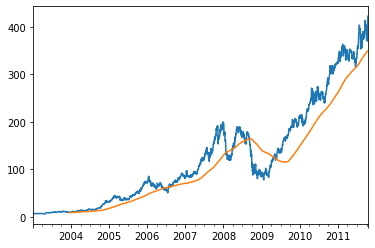

In [140]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

表达式`rolling(250)`与`groupby`的行为类似，但是它创建的对象是根据250日滑动窗口分组的而不是直接分组。因此这里获得了苹果公司股票价格的250日移动窗口平均值。

默认情况下，滚动函数需要窗口中所有的值必须是非NA值。由于存在缺失值这种行为会发生改变，尤其是在时间序列的起始位置拥有的数据是少于窗口区间的：

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64


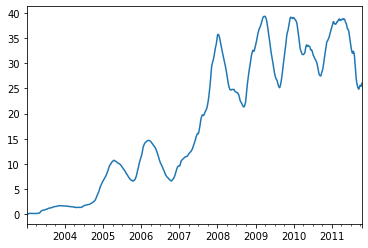

In [141]:
# min_periods：最少需要有值的观测点的数量，对于int类型，默认与window相等。对于offset类型，默认为1。
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

print(appl_std250[5:12])

appl_std250.plot()

为了计算扩展窗口均值，使用`expanding`算子，而不是`rolling`。扩展均值从时间序列的起始位置开始时间窗口，并增加窗口的大小，直到它涵盖整个序列。apple_std250的扩展均值窗口如下：

In [142]:
expanding_mean = appl_std250.expanding().mean()

在DataFrame上调用一个移动窗口函数会将变换应用到每一列上：

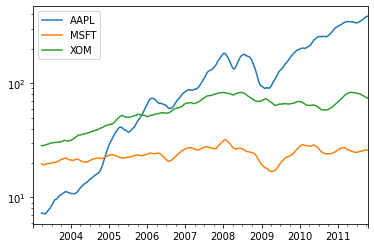

In [143]:
close_px.rolling(60).mean().plot(logy=True)

`rolling`函数也接收表示固定大小的时间偏置字符串，而不只是一个区间的集合数字。对不规则时间序列使用注释非常有用。这些字符串可以传递给`resample`。例如，可以像这样计算20天的滚动平均值：

In [144]:
close_px.rolling('20D').mean().head()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000


### 11.7.1　指数加权函数
指定一个常数衰减因子以向更多近期观测值提供更多权重，可以替代使用具有相等加权观察值的静态窗口尺寸的方法。有多种方式可以指定衰减因子。其中一种流行的方式是使用一个`span`（跨度），这使得结果与窗口大小等于跨度的简单移动窗口函数。

由于指数加权统计值给更近期的观测值以更多的权重，与等权重的版本相比，它对变化“适应”得更快。

pandas拥有`ewm`算子，同`rolling`、`expanding`算子一起使用。以下是将苹果公司股票价格的60日均线与`span=60`的EW移动平均线进行比较的例子：

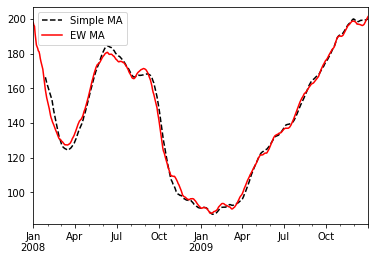

In [145]:
aapl_px = close_px.AAPL['2008':'2009']

ma60 = aapl_px.rolling(30, min_periods=20).mean()

ewma60 = aapl_px.ewm(span=30).mean()

# fig = plt.figure()

ma60.plot(style='k--', label='Simple MA')

ewma60.plot(style='r-', label='EW MA')

plt.legend()

### 11.7.2　二元移动窗口函数
一些统计算子，例如相关度和协方差，需要操作两个时间序列。例如，金融分析师经常对股票与基准指数（如标普500）的关联性感兴趣。为了了解这个功能，首先计算所有我们感兴趣的时间序列的百分比变化：

In [146]:
spx_px = close_px_all['SPX']

spx_rets = spx_px.pct_change()

returns = close_px.pct_change()

在调用`rolling`后，`corr`聚合函数可以根据spx_rets计算滚动相关性：

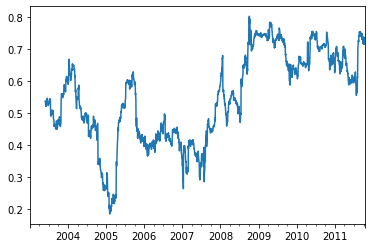

In [147]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

假设想要一次性计算多只股票与标普500的相关性。编写循环并创建一个新的DataFrame是简单的但可能也是重复性的，所以如果传递了一个Series或一个DataFrame，像`rolling_corr`这样的函数将会计算Series（例子中的spx_rets）与DataFrame中每一列的相关性：

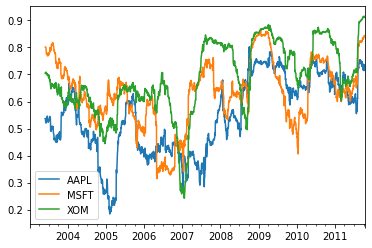

In [148]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 11.7.3　用户自定义的移动窗口函数
在`rolling`及其相关方法上使用`apply`方法提供了一种在移动窗口中应用自己设计的数组函数的方法。唯一的要求是该函数从每个数组中产生一个单值（缩聚）。例如，尽管可以使用`rolling(...).quantile(q)`计算样本的分位数，但可能会对样本中特定值的百分位数感兴趣。
`scipy.stats.percentileofscore`函数就是实现这个功能：

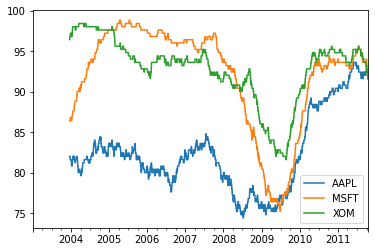

In [149]:
# 一年窗口下苹果公司股价2%收益的百分位等级
from scipy.stats import percentileofscore

score_at_2percent = lambda x: percentileofscore(x, 0.02)

result = returns.rolling(250).apply(score_at_2percent, raw=True)

result.plot()